

# Project 2: Investigate TMDb movie data from kaggle

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>  The film industry is in full swing. The emergence of new multimedia platforms such as netflix or amazong prime, requires a redefinition and replacement of its structure and direction. The big Hollywood productions have a new competitor in a new format that day after day absorbs their expectations and customers. What are the characteristics of the sector? Is it really in decline? Throughout this document, we will prepare the database and describe the characteristics of this market. Using descriptive and inferential statistics we will try to establish a diagnosis of the sector

> A study on the last years of film productions is an interesting exercise to understand the sector and the impact of new platforms on it. We propose to describe this market through certain problems, make a diagnosis and infer certain measures


> To perfomr the analysis we will use the TMDb database
> This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.
> - Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
> - There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
> - The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

## Problematics
> - What are the main producers in the sector, in which genres did they invest the largest budgets? What results did they have?
> - What are the most popular genres? How are they located in the valuation ranking? Are the most viewed the best valued too?
> - On average, what is the most profitable genre? What is the least?
> - What is the average budget for film productions? Is there a budget that ensures profitability?
> - What are the movies with the most benefits, are they in the most popular genres?
> - Is the scene dominated by a small number of directors or is there a diversity of production teams? Is there a director who ensures profitability?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **DataBase reconnition**: In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [2]:
df = pd.read_csv(r'database/tmdb-movies.csv')
df_copy = df
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


## Characteristics 
> to have a better understanding of the database caracteristics, we perform some assesing descriptions of the data with the objective of build intuitions relatives to the  **`problematics`**.
> - First, we perform the functions shape and data types. to see the size of the dataset and the types of the columns. we notice that the column realise_Date is in fact a date that need to be changed. with this information we can easly understand if the data is quantitative o categorical.
> - Next, we perform the info function to relate the null values for each column and the data types
> - With the function nunique, we see the number of differents values in each variable.
> - Value counts is a really handy function to understand if a columns messy or not.


In [3]:
df.shape

(10866, 21)

In [4]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [7]:
df.production_companies.value_counts().head(25)

Paramount Pictures                              156
Universal Pictures                              133
Warner Bros.                                     84
Walt Disney Pictures                             76
Columbia Pictures                                72
Metro-Goldwyn-Mayer (MGM)                        72
New Line Cinema                                  61
Touchstone Pictures                              51
20th Century Fox                                 50
Twentieth Century Fox Film Corporation           49
TriStar Pictures                                 45
Orion Pictures                                   42
Miramax Films                                    32
Columbia Pictures Corporation                    31
DreamWorks Animation                             31
Pixar Animation Studios                          30
Walt Disney Productions                          29
Dimension Films                                  28
United Artists                                   23
Imagine Ente

In [8]:
df.genres.value_counts().head(20)

Drama                   712
Comedy                  712
Documentary             312
Drama|Romance           289
Comedy|Drama            280
Comedy|Romance          268
Horror|Thriller         259
Horror                  253
Comedy|Drama|Romance    222
Drama|Thriller          138
Comedy|Family           102
Action|Thriller         101
Thriller                 93
Drama|Comedy             92
Animation|Family         90
Crime|Drama|Thriller     81
Crime|Drama              74
Comedy|Horror            72
Drama|Comedy|Romance     64
Action                   63
Name: genres, dtype: int64

## ASSESS

> - missing values: producction companies,cast..
> - inaccured datatypes: release date
> - inconsistency data: genres, porduction companies
> - duplicated values
> - the loc function is a perfect tool to filter the data and in ths case look after some inconsistencies in it.

In [9]:
df.loc[df.duplicated(subset='original_title')].shape

(295, 21)

In [10]:
df.loc[df.popularity != 0].shape

(10866, 21)

In [11]:
df.loc[(df.revenue == 0) & (df.budget == 0)].shape

(4701, 21)

### Data Cleaning 

#### Data type correction

In [12]:
df['release_date'] = pd.to_datetime(df.release_date)

#### Droping duplicated values

In [13]:
df.drop_duplicates(subset='original_title', keep='first', inplace=True)

#### Reduce output values

In [14]:
df['genres'] = df['genres'].str.split('|', expand=True)[1]

In [15]:
df['production_companies'] = df['production_companies'].str.split('|', expand=True)[1]

#### Inconsistency between values

In [16]:
def conditional_change(col_name, value_in, value_out):
    df.loc[df[col_name].str.contains(value_in, case=False, na=False), col_name] = value_out
    return df
    

In [17]:
conditional_change('production_companies', 'fox', 'Twentieth Century Fox Film Corporation')
conditional_change('production_companies', 'warner', 'Warner Bros')
conditional_change('production_companies', 'disney', 'Walt Disney Production')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Adventure,Amblin Entertainment,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Adventure,Kennedy Miller Productions,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Science Fiction,Mandeville Films,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Adventure,Truenorth Productions,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Crime,Original Film,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,None,None,2066-06-15,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Adventure,Joel Productions,2066-12-21,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Comedy,None,2066-01-01,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Comedy,None,2066-11-02,22,5.4,1966,0.000000e+00,0.000000e+00


In [18]:
df.production_companies.value_counts().head(70)

Warner Bros                               224
Twentieth Century Fox Film Corporation     74
Touchstone Pictures                        63
Metro-Goldwyn-Mayer (MGM)                  62
Walt Disney Production                     57
                                         ... 
Robert Simonds Productions                  9
British Broadcasting Corporation (BBC)      9
Lakeshore Entertainment                     9
Stage 6 Films                               9
Vertigo Entertainment                       9
Name: production_companies, Length: 70, dtype: int64

#### Innacurates values (original title)

In [19]:
df.loc[df.duplicated(subset='original_title')]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [20]:
df.drop_duplicates(subset='original_title' , keep='first', inplace=True)

#### Innacurates values (release_date)

> there are 328 movies registred with the wrong year, to correct them we use an apply function combined with a lambda function to replace the values that are wrong

In [21]:
df.loc[df.release_date.dt.year > 2015].shape

(328, 21)

In [22]:

df['release_date'] = df['release_date'].apply(lambda x: x.replace(year = x.year -100) if x.year>2015 else x)

> the revenue and budget column  have almost half of the registred values indicating 0. This represents almost half of the dataset. here we have differents options:
> - to use the mean of each year and each genre to aproximante a value
> - to consider them as a null values and drop them.

In [23]:
df_2 = df.loc[(df.revenue != 0) & (df.budget != 0)]

> - We generate a new dataframe df2 with completes observations for each row.
> - This new df is generated to study te evolution and direction of the budget and revenues of the film industrie al over the las 60 years.

#### Drop unnecesaries columns

In [24]:
df_2.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [25]:
df_2.drop(columns=['imdb_id','cast', 'homepage','tagline', 'keywords', 'overview', 'runtime'], inplace=True)

c:\program files\python38\lib\site-packages\pandas\core\frame.py:3987: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
df_2.head()

,id,popularity,budget,revenue,original_title,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Adventure,Amblin Entertainment,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,Adventure,Kennedy Miller Productions,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,Science Fiction,Mandeville Films,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Adventure,Truenorth Productions,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,Crime,Original Film,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Describe values

In [27]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3756.0,4.055726e+04,6.786629e+04,5.000000,6.430000e+03,1.137050e+04,3.971350e+04,4.178590e+05
popularity,3756.0,1.194688e+00,1.486161e+00,0.001117,4.631333e-01,7.983430e-01,1.374400e+00,3.298576e+01
budget,3756.0,3.752862e+07,4.244601e+07,1.000000,1.000000e+07,2.400000e+07,5.000000e+07,4.250000e+08
revenue,3756.0,1.082386e+08,1.770478e+08,2.000000,1.358668e+07,4.483448e+07,1.256217e+08,2.781506e+09
vote_count,3756.0,5.307348e+02,8.857413e+02,10.000000,7.100000e+01,2.050000e+02,5.812500e+02,9.767000e+03
vote_average,3756.0,6.164004e+00,7.949363e-01,2.200000,5.675000e+00,6.200000e+00,6.700000e+00,8.400000e+00
release_year,3756.0,2.001538e+03,1.106193e+01,1960.000000,1.996000e+03,2.004000e+03,2.010000e+03,2.015000e+03
budget_adj,3756.0,4.436703e+07,4.498007e+07,0.969398,1.319180e+07,3.014881e+07,6.061307e+07,4.250000e+08
revenue_adj,3756.0,1.363931e+08,2.158969e+08,2.370705,1.830994e+07,6.092554e+07,1.619430e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

> with the data wrangling done with use differents datastes to find some insights. reated to the problematics that came out with the gather of the dataset.
### What was the evolution of the profits of the film industry during the period 1960 - 2018?

> to understand the evolution of the budget and the revenues of the industrie we use the function group by. and then, we plot it with a line plot using seaborn.

In [28]:
df_year = df_2.groupby(df['release_date'].dt.year).mean().reset_index()

In [29]:
def lineplot_x_2(x_axes, y1_axes, y2_axes, df):
    sns.set(style="darkgrid")
    plt.figure(figsize=(16,9))
    ax = sns.lineplot(x=x_axes, y=y1_axes, label=f"mean {y1_axes}", data=df)
    ax = sns.lineplot(x=x_axes, y=y2_axes, label=f"mean {y2_axes}", data=df)
    ax.set_title(f'Average {y1_axes} and {y2_axes} by year', fontsize=18)
    ax.set_xlabel('years')
    ax.set_ylabel('results');
    

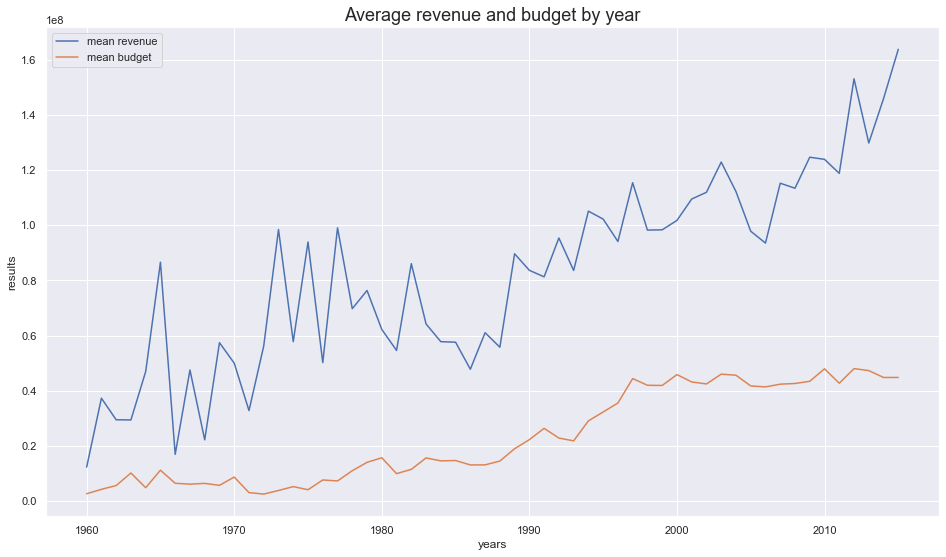

In [30]:
lineplot_x_2('release_date', 'revenue', 'budget', df_year)

> - the revenue curve is very intermittent. Growth processes last 2-3 years and are interrupted by abrupt falls. this pattern is reproduced throughout the study period
> - at the end of the 80s, the amplitude of the volatility of the revenues is reduced and the difference between this curve and that of the budget that is maintained at around 450,000,000.00 is enlarged.
> - The maximum recorded results are 1,600,000,000.00 relative to 2015, the last year with records.

In [31]:
df_year_sum = df_2.groupby(df['release_date'].dt.year).sum().reset_index()
df_year_sum['profit'] = df_year_sum['revenue'] - df_year_sum['budget']
df_year_sum.sort_values(by='profit', axis=0, ascending=False).head(10)

,release_date,id,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
55,2015,40164198,457.110856,7170777528,26202922801,155369,999.0,322400,6.597112e+09,2.410668e+10,19032145273
54,2014,32176813,416.406465,7393768000,24069969357,169922,1045.6,332310,6.810334e+09,2.217063e+10,16676201357
52,2012,12619538,222.580212,7587610525,24184456032,160629,946.3,317896,7.206290e+09,2.296905e+10,16596845507
51,2011,11301674,238.473152,8416550543,23404448100,121027,1203.1,396167,8.158988e+09,2.268823e+10,14987897557
53,2013,22144450,243.244332,8372922778,22974907074,177627,1097.4,356301,7.837335e+09,2.150528e+10,14601984296
49,2009,3425233,197.929015,7511827919,21563814641,102827,1046.3,347557,7.635025e+09,2.191747e+10,14051986722
50,2010,6327730,208.805990,8441108439,21802891959,115323,1074.1,353760,8.441108e+09,2.180289e+10,13361783520
48,2008,1824188,178.003082,6991556800,18599657891,85593,991.5,329312,7.080955e+09,1.883748e+10,11608101091
47,2007,1476451,159.612919,6740517892,18321062428,74054,980.8,319113,7.088791e+09,1.926769e+10,11580544536
44,2004,1267794,162.605879,6661999308,16381794281,71424,890.4,292584,7.690914e+09,1.891189e+10,9719794973


> - In generals terms boths curves, are increasing. The revenue presents a higher volatility but the tendency shows how it is separating from the budget curve. In the last 20 years, there are two low bounces probably relates to the online piracy with web like piratebay or mega and in the erlies 2010 probaly related with the new multimedia plataforms. 
> - Even so, they revenues continue to grow in a faster than they budgets that stays leveled around the 400.000.000 for the all industrie
> - To check for more granularity, we add the month value to the dataset, and we use the rolling function smooth the curves.

In [32]:
df_2['month_year'] = df_2['release_date'].dt.to_period('M')
df_y_m = df_2.groupby([df_2.month_year]).mean().reset_index()
df_y_m

<ipython-input-32-d9f477d823fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['month_year'] = df_2['release_date'].dt.to_period('M')


,month_year,id,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,1960-06,284.000000,0.947307,3.000000e+06,2.500000e+07,235.000000,7.900000,1960.0,2.211890e+07,1.843242e+08
1,1960-10,966.000000,1.872132,2.000000e+06,4.905000e+06,224.000000,7.000000,1960.0,1.474593e+07,3.616441e+07
2,1960-12,18973.000000,0.055821,3.000000e+06,7.100000e+06,13.000000,7.200000,1960.0,2.211890e+07,5.234807e+07
3,1961-01,12230.000000,2.631987,4.000000e+06,2.158800e+08,913.000000,6.600000,1961.0,2.917944e+07,1.574815e+09
4,1961-03,18647.000000,0.173731,6.000000e+06,4.300000e+06,17.000000,6.100000,1961.0,4.376917e+07,3.136790e+07
...,...,...,...,...,...,...,...,...,...,...
531,2015-08,254943.916667,1.903474,3.291667e+07,7.925642e+07,659.416667,6.216667,2015.0,3.028332e+07,7.291588e+07
532,2015-09,271716.041667,1.804688,3.292083e+07,1.050920e+08,701.875000,6.320833,2015.0,3.028715e+07,9.668463e+07
533,2015-10,264129.529412,2.141399,3.543706e+07,9.103131e+07,710.764706,6.447059,2015.0,3.260208e+07,8.374877e+07
534,2015-11,266496.000000,2.278568,4.359444e+07,1.108521e+08,658.888889,6.427778,2015.0,4.010687e+07,1.019839e+08


> - before plotting the results, we use the rolling function to smooth the curve and make ir more readable

In [33]:
df_y_m['budget_semestre'] = df_y_m['budget'].rolling(6).mean()
df_y_m['revenue_semestre'] = df_y_m['revenue'].rolling(6).mean()

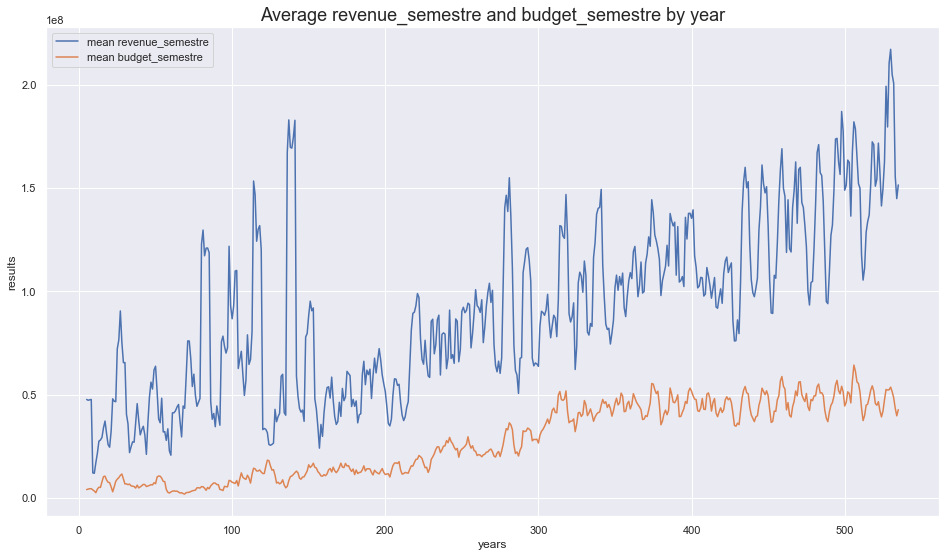

In [34]:
lineplot_x_2(df_y_m.index, 'revenue_semestre', 'budget_semestre', df_y_m)

> - The two curves presents some paralalism. The tendency shows that when a budget breaks the market a big increase in the revenue happens.the movements in the budget curve exponentially affect the profit curve
> - The last 8 years, presents the budgets expends with intermittent evolution follow by an intermittent revenue that in generals terms is increassing. Lets' make a zoom of it using plt.xlimt

In [35]:
df_y_m.sort_values(by='revenue', axis=0,ascending=False)

,month_year,id,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget_semestre,revenue_semestre
136,1982-04,601.000000,2.900556,1.050000e+07,7.929106e+08,1830.000000,7.200000,1982.0,2.372625e+07,1.791694e+09,5.558334e+06,1.673479e+08
114,1980-01,1891.000000,5.488441,1.800000e+07,5.384000e+08,3954.000000,8.000000,1980.0,4.762866e+07,1.424626e+09,1.436389e+07,1.535015e+08
80,1975-06,578.000000,2.563191,7.000000e+06,4.706540e+08,1415.000000,7.300000,1975.0,2.836275e+07,1.907006e+09,5.407083e+06,1.229285e+08
535,2015-12,264217.333333,4.516088,7.333333e+07,3.860243e+08,1765.222222,6.622222,2015.0,6.746664e+07,3.551422e+08,4.273060e+07,1.516117e+08
463,2009-12,17482.090909,1.680397,7.281818e+07,3.816423e+08,1114.454545,6.218182,2009.0,7.401243e+07,3.879014e+08,4.613999e+07,1.444139e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
91,1977-01,72277.000000,0.191541,8.100000e+05,1.258000e+06,12.000000,5.800000,1977.0,2.914203e+06,4.526009e+06,6.379444e+06,4.002117e+07
48,1970-02,2998.000000,0.279079,7.000000e+06,9.000000e+05,30.000000,6.500000,1970.0,3.931458e+07,5.054732e+06,6.265681e+06,5.271785e+07
44,1969-06,576.000000,0.615889,6.244087e+06,6.386410e+05,121.000000,7.200000,1969.0,3.711650e+07,3.796251e+06,5.486514e+06,2.107198e+07
134,1982-02,14373.000000,0.464188,2.000000e+00,1.600000e+01,27.000000,5.600000,1982.0,4.519285e+00,3.615428e+01,6.236111e+06,4.128312e+07


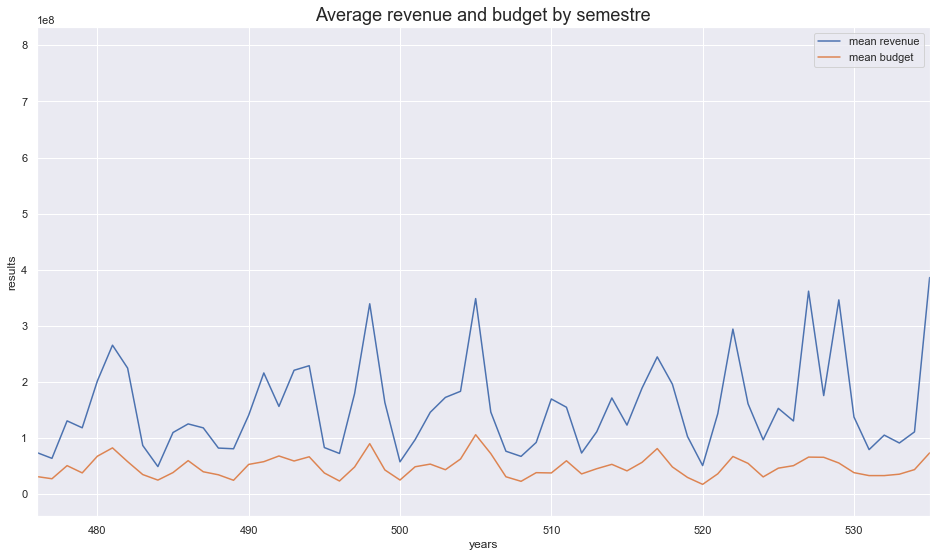

In [36]:
sns.set(style="darkgrid")
plt.figure(figsize=(16,9))
ax = sns.lineplot(x=df_y_m.index, y="revenue", label="mean revenue", data=df_y_m)
ax = sns.lineplot(x=df_y_m.index, y="budget", label="mean budget", data=df_y_m)
ax.set_title('Average revenue and budget by semestre', fontsize=18)
ax.set_xlabel('years')
ax.set_ylabel('results')
ax = plt.xlim(476, 535 )

> en los ultmos 15 años, la curva del budget se mantine con oscilaciones moderadas. que impacatan exponecialmente al revenue. en el 2009, se presenta un maximo, que vulve a ser superado en 2012 y en 2015.

#### Budget & revenues by genre
> - After having seen the evolution of the values generated by the industry over time, we decided to identify the results of each of the genres, to have a more complete perspective of the viewer's tastes and the companies invesments.
> - The group by allow done it before, allows us to make this plot using seaborn box plot

In [37]:
def boxplot(x_axes, y_axes, df):
    sns.set(style='darkgrid')
    plt.figure(figsize=(16,9))
    ax = sns.boxplot(x=x_axes, y=y_axes, orient= "h", data=df)
    ax.set_title(f'{x_axes} by {y_axes}', fontsize=18)
    ax.set_xlabel(f'{x_axes}')
    ax.set_ylabel(f'{y_axes}');

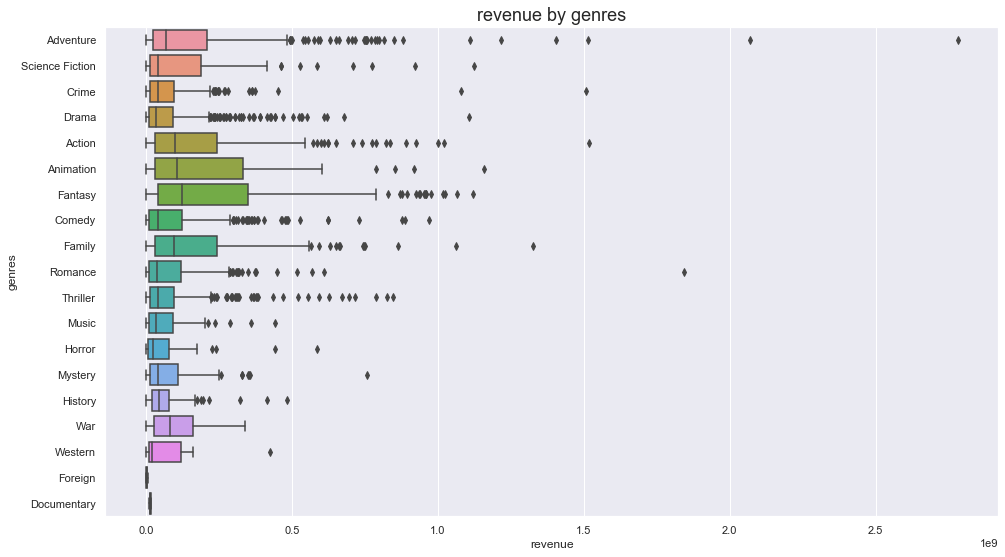

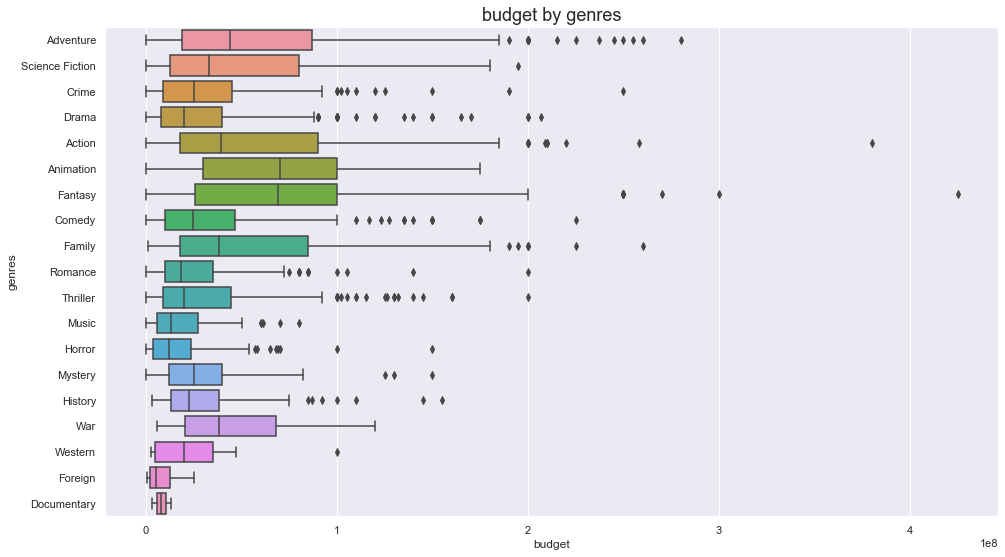

In [38]:
margins = ['revenue', 'budget']

for margin in margins:
    boxplot(margin, 'genres', df_2)

> in average, the profts of the film industries are exponencial.  
> the genres that requires more budgets to make a production are Fantasy and animation, follows by adventure, At the same time, its revenues are the highest
> the foreign productions and the documentary are bellow the average. 

> the diversity existing in the sector, has as a consequence a very large amplitude in monetary terms

#### Budget & Revenue relationship
> To understand the relationship between revenue and budget we can use the scatterplot.


In [39]:
def scatterplot(x_axes, y_axes, hue, df):
    sns.set(style='darkgrid')
    plt.figure(figsize=(16,9))

    ax = sns.scatterplot(x=x_axes, y=y_axes, hue=hue, data=df)
    ax.set_title(f'{x_axes} & {y_axes} by {hue}', fontsize=18)
    ax.set_xlabel(f'{x_axes}')
    ax.set_ylabel(f'{y_axes}');

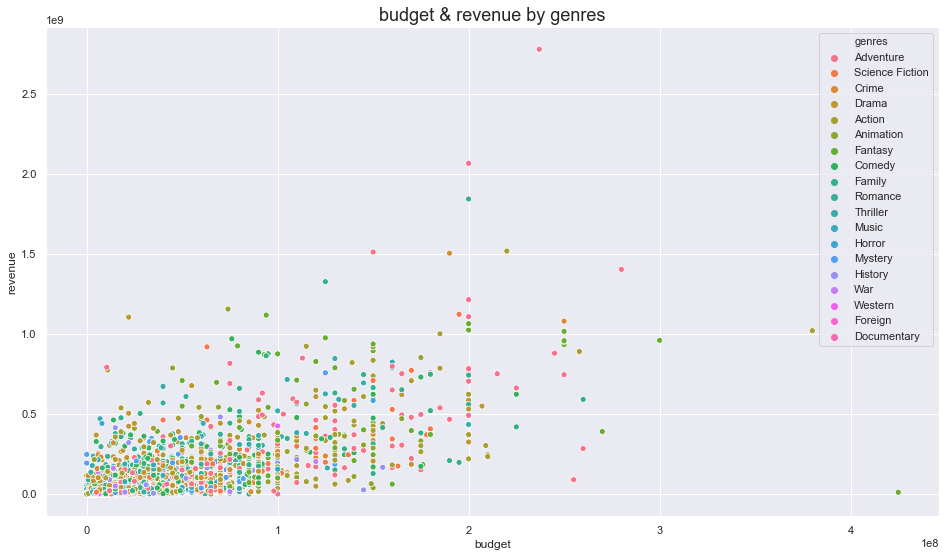

In [40]:
scatterplot('budget', 'revenue', 'genres', df_2)

There is a moderate positive correlation betwen budget and revenue.

#### Budget & Revenue by production companie
> after having studied the behavior of the industry. we propose to focus on the main companies and observe their results. We know that he manages 22% of the profits, so his behaviors define the general results.

In [41]:
df_companies = df_2.groupby(by=['production_companies'], as_index=False).sum()
df_companies.sort_values(by='revenue', ascending=False).head(10)

,production_companies,id,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
1196,Warner Bros,4366930,200.362563,6819177000,18901681612,97912,785.6,247807,8.307347e+09,2.470627e+10
1151,Twentieth Century Fox Film Corporation,2042835,124.332429,3781350000,18724840150,71654,354.3,112164,4.283090e+09,2.421055e+10
862,Pixar Animation Studios,489436,56.476804,2301000000,9698819254,45111,113.6,32106,2.407032e+09,1.041748e+10
55,Amblin Entertainment,779493,84.065109,1834800000,9053944857,38989,195.2,59965,2.238110e+09,1.249767e+10
1168,Universal Pictures,880892,52.005811,2564777025,6587816806,20459,248.0,80019,3.109697e+09,8.346827e+09
780,New Line Cinema,238946,43.772675,1067000000,5988101890,29690,58.1,16038,1.095372e+09,6.484198e+09
821,Original Film,1152462,36.146177,1725000000,5962013012,29108,121.6,40182,1.720252e+09,5.881363e+09
1193,Walt Disney Production,1018681,49.080999,2303431000,5648410737,20170,164.2,50079,2.636372e+09,6.597566e+09
565,Jerry Bruckheimer Films,128277,31.591672,1855000000,5120058749,19287,63.9,20073,1.910737e+09,5.436043e+09
633,Legendary Pictures,665497,55.847220,1410000000,4216538498,30711,71.0,22110,1.425873e+09,4.219046e+09


In [42]:
profit_ten = df_companies.sort_values(by='revenue', ascending=False).head(10).iloc[:,4].sum() / df_2.iloc[:,3].sum()*100

print(f' the total revenue generated by the film industry ascends to {df_2.iloc[:,3].sum()}, of witch {profit_ten} % is controled by the 10 mayor companies in the industry ')

 the total revenue generated by the film industry ascends to 406544127181, of witch 22.11376811378069 % is controled by the 10 mayor companies in the industry 


In [43]:
prin_comp = list(df_companies.sort_values(by='revenue', ascending=False).head(10).iloc[:,0])

In [44]:
df_prin_comp = df_2.loc[df_2['production_companies'].isin(prin_comp)]

In [45]:
df_time_comp = df_prin_comp.groupby(['release_year','production_companies'],axis=0,as_index=False).sum()
df_time_comp.sort_values('revenue',ascending=False).head(10)

,release_year,production_companies,id,popularity,budget,revenue,vote_count,vote_average,budget_adj,revenue_adj
135,2009,Twentieth Century Fox Film Corporation,114662,17.075648,603000000,4541406391,13811,40.7,6.128895e+08,4.615887e+09
55,1997,Twentieth Century Fox Film Corporation,19468,7.697376,256500000,2242688658,5623,20.9,3.484451e+08,3.046604e+09
103,2004,Warner Bros,31789,11.683866,454000000,1682199952,6175,32.4,5.241182e+08,1.942008e+09
176,2015,Amblin Entertainment,431495,36.633973,190000000,1676139283,7200,13.6,1.747999e+08,1.542047e+09
178,2015,Original Film,425704,12.979555,248000000,1656420175,3547,13.5,2.281599e+08,1.523906e+09
114,2006,Twentieth Century Fox Film Corporation,5029,6.755179,290000000,1484709726,3883,17.4,3.136841e+08,1.605965e+09
169,2014,Legendary Pictures,331258,31.667504,395000000,1366357750,10333,20.3,3.638310e+08,1.258540e+09
159,2012,Warner Bros,117760,8.594509,294500000,1313365415,9208,14.5,2.796997e+08,1.247361e+09
125,2008,Legendary Pictures,7995,10.308507,290000000,1267921825,9018,13.3,2.937081e+08,1.284134e+09
40,1993,Amblin Entertainment,753,4.582214,85000000,1241365768,5801,15.5,1.283049e+08,1.873804e+09


In [46]:
def lineplot_x_1(x_axes, y_axes, hue, df):
    sns.set(style="darkgrid")
    plt.figure(figsize=(16,9))
    palette = sns.color_palette("mako_r", df[f'{hue}'].nunique())
    ax = sns.lineplot(x=x_axes, y=y_axes, hue=hue, palette=palette, data=df)

    ax.set_title(f'Average {y_axes} by {x_axes} of the {hue}', fontsize=18)
    ax.set_xlabel('years')
    ax.set_ylabel('results');

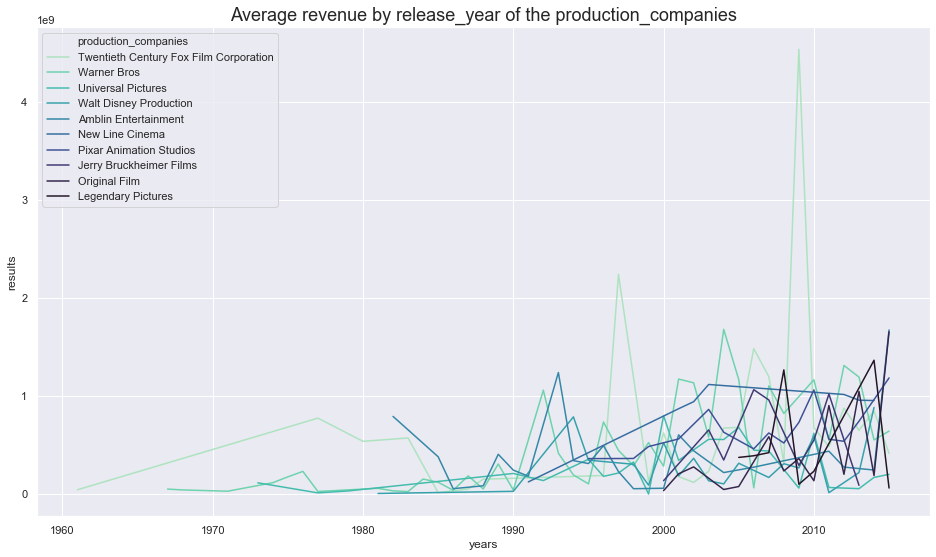

In [47]:
lineplot_x_1('release_year', 'revenue', 'production_companies', df_time_comp)

> twenty century fox is the longest-running production company on the mayors 10 list.
> company profit curves show 2 extreme outlier. both belonging to twenty century fox and directed by the same director James Cameron: Titanic and avatar  
> Pixar animations is the cmost stable of the mayor ten.


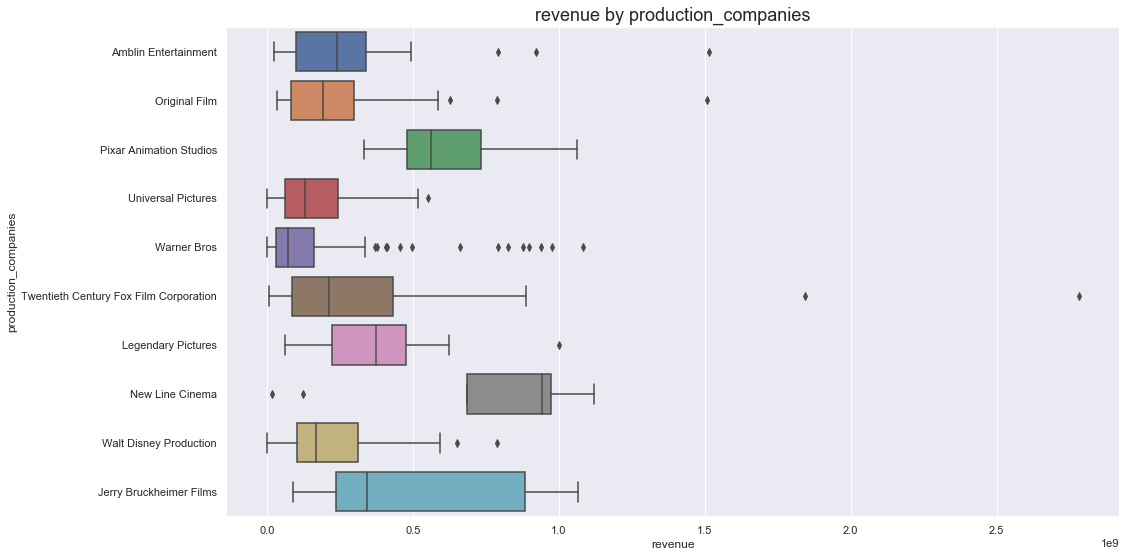

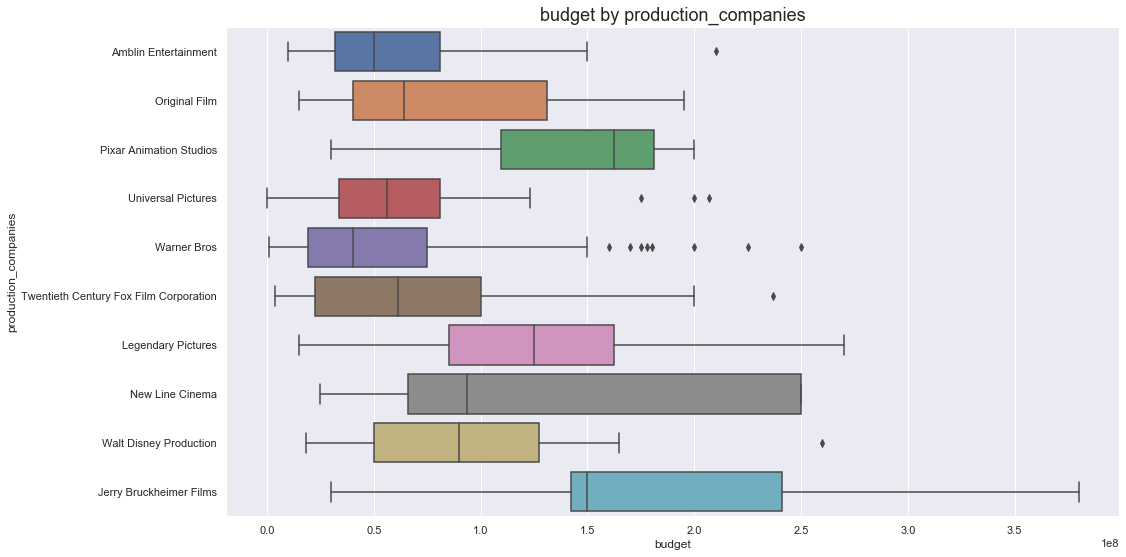

In [48]:
for margin in margins:
    boxplot(margin, 'production_companies', df_prin_comp)

> in average Pixar Animations is the company with most budgets investissements, clossely followed by Jerry Bruckheimer Films, but with a wider dsitribution. in fact, this company spended the bigger budget for a film production 
> on another hand, Warner Bros has the smaller average budget but with the biggest number of possitives outliers  
> regarding the revenues, new line cinema leads the table. followed by Pixar animations, which has no adversaries in its genre   
> the films that collected the most belong in first and second place to 20 century fox, and in third place to amban films

### What is the most popular genre?

> the values related to the popularity and rating of the viewers was complete in the kaggle dataset, to answer this question then we use that dataset again as the largest number of values

In [49]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Adventure,Amblin Entertainment,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Adventure,Kennedy Miller Productions,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Science Fiction,Mandeville Films,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Adventure,Truenorth Productions,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Crime,Original Film,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [50]:
#table = pd.pivot_table(df, values='D', index=['A', 'B'],columns=['C'], aggfunc=np.sum)
df.pivot_table(values='popularity', index=['genres'], columns=['release_year'], aggfunc=np.mean)

release_year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
genres,,,,,,,,,,,,,,,,,,,,,
Action,NaN,0.275009,1.391843,NaN,1.185667,1.910465,0.291704,0.438314,0.149294,1.095281,...,1.064688,0.796358,1.254286,1.244118,0.782297,1.301557,1.214979,1.109440,1.259800,1.315581
Adventure,1.872132,0.657446,0.468481,0.781120,NaN,0.312067,0.297781,0.285577,0.190352,0.519370,...,0.719188,0.608456,0.712731,0.892251,0.929869,1.053092,1.542262,1.185849,2.305045,4.665070
Animation,NaN,2.631987,NaN,NaN,NaN,NaN,0.276133,NaN,NaN,0.528660,...,0.889928,0.576487,0.769104,0.668508,0.828802,1.339624,0.697521,0.453336,0.772482,1.903577
Comedy,NaN,NaN,0.153654,0.203298,0.544644,NaN,0.223819,0.101727,0.237245,0.165701,...,0.565816,0.612915,0.516701,0.595964,0.541470,0.606074,0.795340,0.644975,0.861175,0.842056
Crime,NaN,0.806519,NaN,NaN,0.626005,0.289649,0.737730,NaN,0.596070,0.589059,...,0.436054,0.653882,0.609462,0.577373,0.822502,0.798374,1.103972,1.031136,0.597559,1.906528
Documentary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.237683,0.238035,0.272288,0.222540,0.207575,0.288922,0.128774,0.064496,0.191898,0.279312
Drama,0.412792,0.390316,0.453233,0.324263,0.231447,0.213986,0.263784,0.582216,0.382746,0.833426,...,0.630749,0.631859,0.447758,0.589675,0.602838,0.552012,0.534757,0.619755,1.137450,1.189173
Family,0.278064,0.280829,NaN,1.179561,0.665686,0.957326,0.540682,NaN,0.633129,0.367522,...,0.599372,0.490803,1.018564,0.671213,0.791393,1.022506,0.604563,0.786435,1.573373,1.808794
Fantasy,NaN,NaN,NaN,NaN,0.160098,NaN,NaN,NaN,0.403558,0.267140,...,1.064055,1.235307,0.876445,0.896051,1.412001,1.087281,1.352557,0.683427,1.844601,3.533745


In [51]:
df_popularity = df.groupby(['release_year', 'genres'],as_index=False).mean()
df_popularity['pop_semestre'] = df_popularity['popularity'].rolling(12).mean()



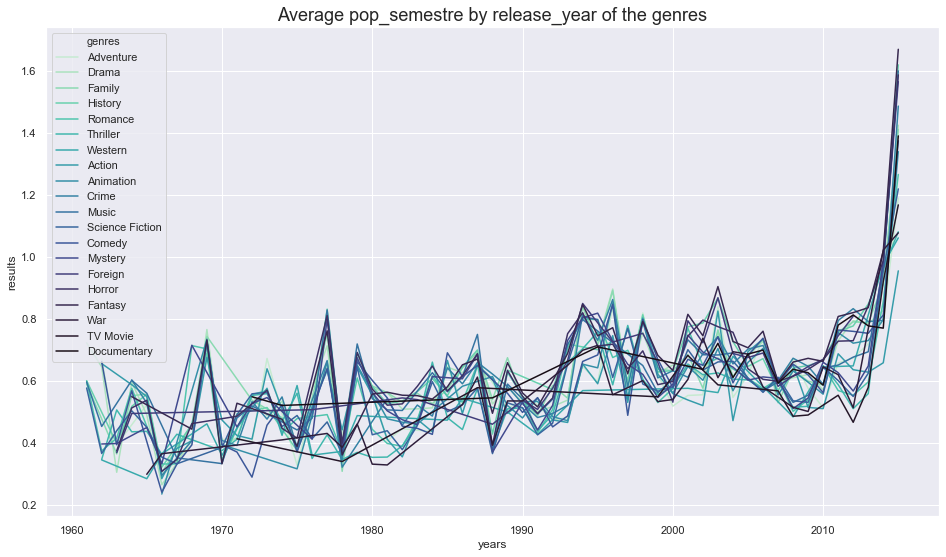

In [52]:
lineplot_x_1('release_year', 'pop_semestre', 'genres', df_popularity)

In [61]:
df_popularity.loc[df_popularity['release_year']==2015].sort_values(by='popularity',ascending=False)

,release_year,genres,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj,pop_semestre
854,2015,Adventure,251646.200000,4.665070,6.216000e+07,3.140688e+08,101.120000,1422.600000,6.172000,5.718717e+07,2.889431e+08,1.189856
861,2015,Fantasy,209785.500000,3.533745,7.075000e+07,1.815848e+08,116.500000,916.250000,5.550000,6.508997e+07,1.670579e+08,1.670279
857,2015,Crime,287416.125000,1.906528,3.525000e+07,1.218250e+08,116.625000,539.875000,6.100000,3.242999e+07,1.120789e+08,1.486892
855,2015,Animation,274308.687500,1.903577,4.131250e+07,2.065514e+08,80.250000,666.875000,6.337500,3.800748e+07,1.900272e+08,1.339789
860,2015,Family,289652.800000,1.808794,6.800000e+07,6.748480e+07,84.600000,529.200000,6.680000,6.255997e+07,6.208599e+07,1.411602
867,2015,Science Fiction,289027.346154,1.344678,1.025000e+07,2.626538e+07,92.807692,344.500000,5.384615,9.429996e+06,2.416414e+07,1.219550
853,2015,Action,297687.289474,1.315581,1.685921e+07,4.569690e+07,92.815789,410.921053,5.428947,1.551047e+07,4.204113e+07,0.954817
859,2015,Drama,294297.709302,1.189173,1.160814e+07,3.243085e+07,104.965116,334.244186,6.137209,1.067948e+07,2.983637e+07,1.425229
866,2015,Romance,279791.785714,1.065802,4.714286e+06,4.568167e+07,106.642857,264.000000,6.164286,4.337141e+06,4.202711e+07,1.266125
871,2015,Western,321466.000000,0.993217,3.090000e+07,0.000000e+00,125.500000,236.000000,5.550000,2.842799e+07,0.000000e+00,1.061324


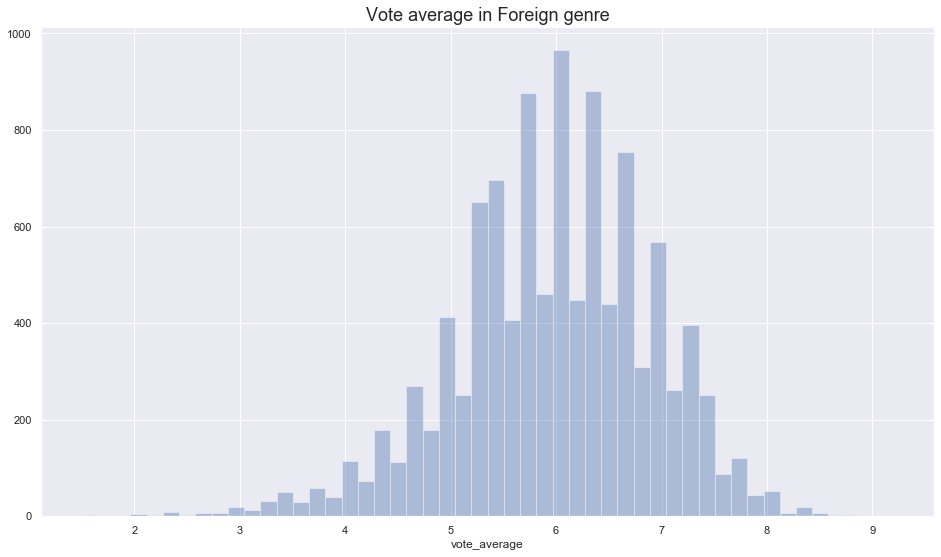

In [70]:
#genres = [i for i in df.genres.unique().tolist() if type(i) == str]
#for genre in genres:

sns.set(style='darkgrid')
plt.figure(figsize=(16,9))
plot=df['vote_average']
ax = sns.distplot(plot,kde=False,hist=True)
ax.set_title(f'Vote average in {genre} genre', fontsize=18);


> less than 1000 movies have been rates with more than 7 points  
> over 1500 have been rated with 5 or less.
> over 4500 have been rated between 5.5 and 6.5

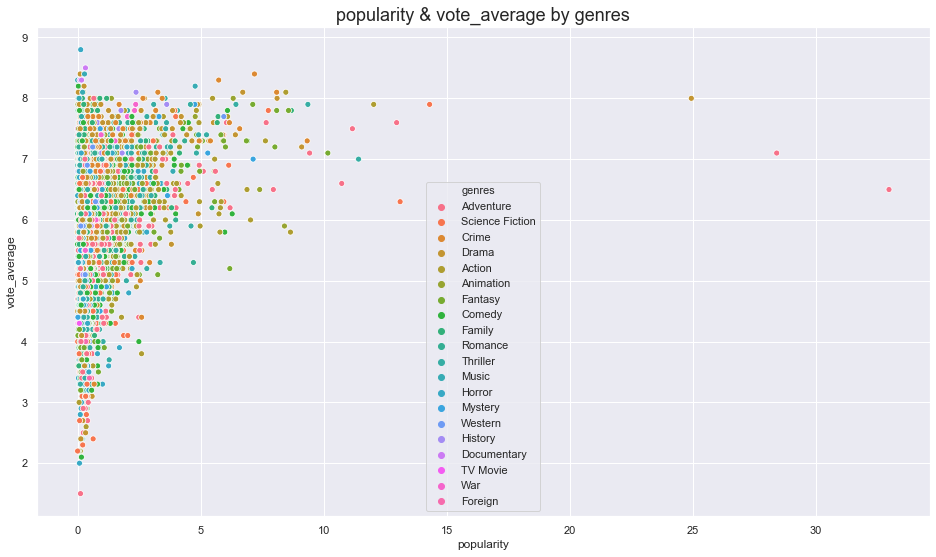

In [55]:
scatterplot('popularity', 'vote_average', 'genres', df)

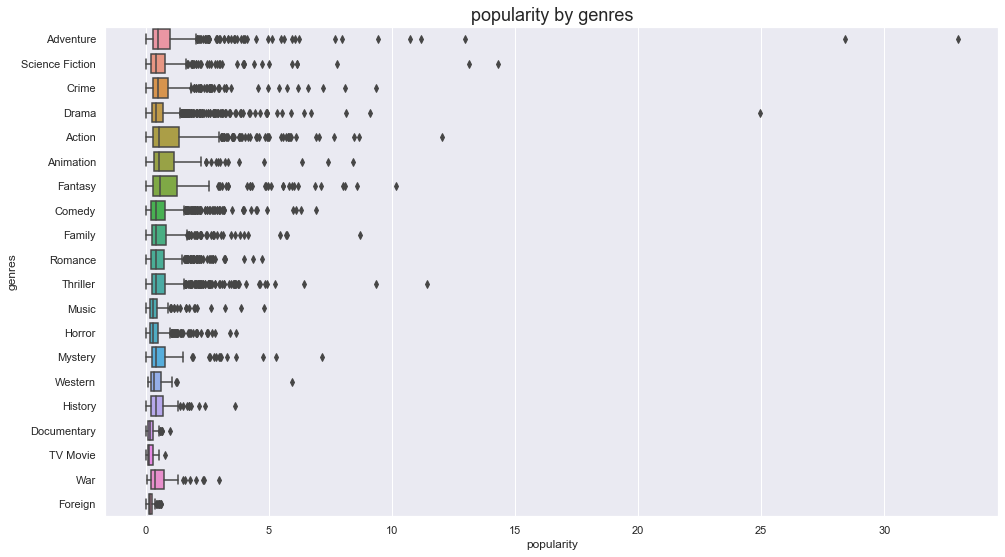

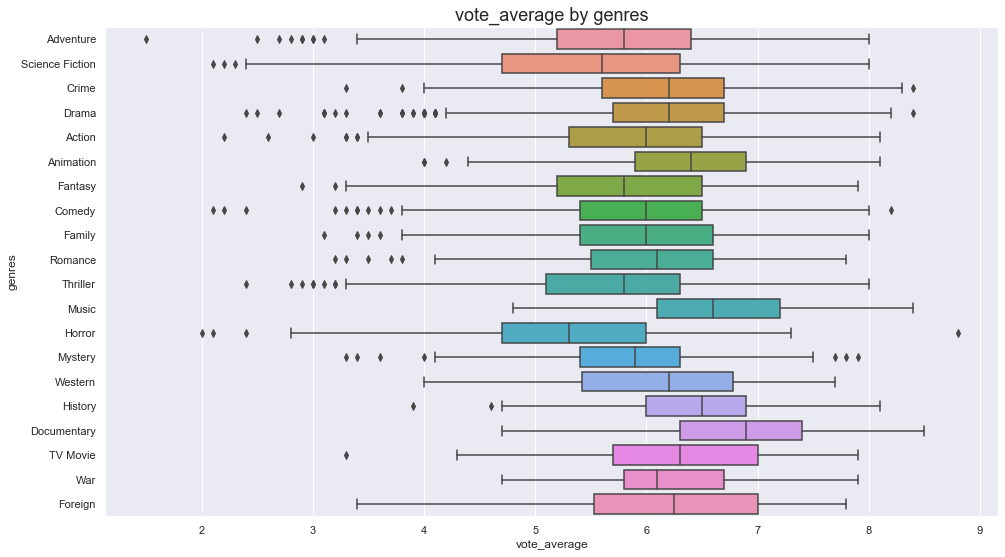

In [56]:
people_choice = ['popularity', 'vote_average']

for choice in people_choice:
    boxplot(choice, 'genres', df)

> the genre most popular is action, but the most populars movies are in the adventure genre.  
> the amound of outliers affects the visualization of this variable  
>the votes average is the result of what it seems an online survey. the volumen of vots registers is significantly small in comparation with the audience popularity. so this results can be bias.  
> The big mayority of genres has the average vots between 6 and 7.


<a id='conclusions'></a>
## Conclusions

> - despite the new competitors that have emerged in recent years and the increase in illegal online download and playback platforms. The profits of the great companies in the film industry are exceeded year by year, with the virtue of having leveled expenses on average.
> - the volatility of the benefits is directly related to the budgets invested in that period. movements in the budget curve have an exponential impact on the profit curve
> - the total revenue generated by the film industry ascends to 406.544.127.181,00 us, of witch 22.11 % is controled by the 10 mayor companies.
> - The adventure genre presents two big hits but in general terms the audiences preferes action or fantasy. Also comedy over drama
> - in valoration termes, the betters are music film or documentary boths requiered a slow budget but they don't appeal to the big audiences. this cases can presents a bias in the votes  

> **limitations:** 

> Related to the monetary values of the film industry we find certain limitations.
> - Budgets and revenues do not have currency units, we must assume that they are in it to perform the analysis.
> - The time factor in the budgets was not taken into account, inflation coefficients from different periods were not considered. So the values at the temporal level can have partial results.
> - Within the monetary variables we find both budgets and benefits with values equal to zero (almost half of the datset). To do the study, we discarded them from the sample and considerably reduced the number of elements.  

> Regarding the ratings and ratings of the films
> - Absence of spatial information. The lack of information in this regard prevents us from clustering or generating a diagnosis about any spatial unit. They are absolute values without spatial reference.
> - Very uneven relationship between popularity and number of votes. The opinion of the voters is much lower in scale than the number of spectators, the values are at risk of being partial



In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295